<a href="https://colab.research.google.com/github/Rodolfoxxv/DeepVisionML/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

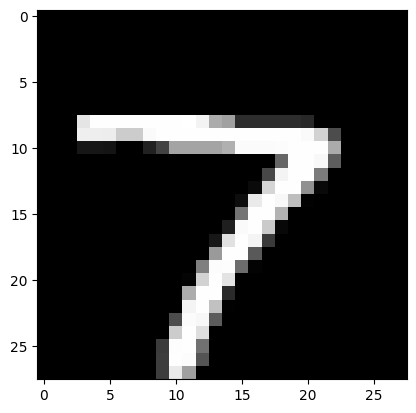

In [ ]:
dataiter = iter(trainloader)
images, etiquetas = next(dataiter)
plt.imshow(images[3].numpy().squeeze(), cmap='Greys_r')

In [ ]:
print(images[3].shape)
print(etiquetas[3].shape)

torch.Size([1, 28, 28])
torch.Size([])


In [ ]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(784, 128)
    self.linear2 = nn.Linear(128, 64)
    self.linear3 = nn.Linear(64, 10)

  def forward(self, x):
    X = F.relu(self.linear1(x))
    X = F.relu(self.linear2(X))
    X = self.linear3(X)
    return F.log_softmax(X, dim=1)

In [ ]:
def treino(modelo, trainloader, device):  # Corrigido aqui
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
  inicio = time()

  criterio = nn.NLLLoss()
  EPOCHS = 10

  for epoch in range(EPOCHS):
    perda_acumulada = 0

    for imagenes, etiquetas in trainloader:

      imagenes = imagenes.view(imagenes.shape[0], -1)
      otimizador.zero_grad()

      output = modelo(imagenes.to(device))
      perda_instantanea = criterio(output, etiquetas.to(device))
      perda_instantanea.backward()
      otimizador.step()

      perda_acumulada += perda_instantanea.item()

    else:
      print("Epoch {} - Perda Resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
  print("\nTempo de treino (em minutos) =", (time()-inicio)/60)

In [ ]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0, 0
  for imagenes, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagenes[i].view(1, 784)
      with torch.no_grad():
        logps = modelo(img.to(device))

      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab))
      etiqueta_certa = etiquetas.numpy()[i]
      if(etiqueta_certa == etiqueta_pred):
        conta_corretas += 1
      conta_todas += 1
  print("Toatal imagens testadas =", conta_todas)
  print("\nPrecisao do modelo: {}%".format(conta_corretas*100/conta_todas))

In [ ]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)